In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import pathlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime, timedelta

import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping

from tensorflow.keras.models import load_model
from tensorflow.keras import layers
from tensorflow.keras.layers import LSTM
from keras.layers import Embedding
from tensorflow.keras.layers import Reshape

from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score 

In [2]:
base_path = 'D:\RRG\VP\MBRDI\Coding_Problem_2\dataset'

In [3]:
import os

data = os.path.join(base_path, '25degC')
l = os.listdir(data)
l = [i for i in l if i.endswith('.csv')]
l

['549_C20DisCh.csv',
 '549_Charge.csv',
 '549_Dis_0p5C.csv',
 '549_Dis_2C.csv',
 '549_HPPC.csv',
 '551_Cap_1C.csv',
 '551_Charge1.csv',
 '551_Charge2.csv',
 '551_Charge3.csv',
 '551_Charge4.csv',
 '551_Charge5.csv',
 '551_Charge6.csv',
 '551_Charge7.csv',
 '551_Charge8.csv',
 '551_HWFET.csv',
 '551_LA92.csv',
 '551_Mixed1.csv',
 '551_Mixed2.csv',
 '551_UDDS.csv',
 '551_US06.csv',
 '552_Cap_1C.csv',
 '552_Charge10.csv',
 '552_Charge11.csv',
 '552_Charge12.csv',
 '552_Charge13.csv',
 '552_Charge14.csv',
 '552_Charge15.csv',
 '552_Charge16.csv',
 '552_Charge9.csv',
 '552_Mixed3.csv',
 '552_Mixed4.csv',
 '552_Mixed5.csv',
 '552_Mixed6.csv',
 '552_Mixed7.csv',
 '552_Mixed8.csv',
 '552_PausCycl.csv']

In [4]:
data1_csv = os.path.join(data, '551_LA92.csv')
data1_csv

'D:\\RRG\\VP\\MBRDI\\Coding_Problem_2\\dataset\\25degC\\551_LA92.csv'

In [5]:
data2_csv = os.path.join(data, '552_Mixed4.csv')
data2_csv

'D:\\RRG\\VP\\MBRDI\\Coding_Problem_2\\dataset\\25degC\\552_Mixed4.csv'

In [6]:
df1 = pd.read_csv(data1_csv, skiprows=30)
df1.head()

,10/29/2018 3:53:42 AM,39,TABLE,16:50:37.323,00:00:01.673,1,1.1,LG_HG2_CyclesA,4.19155,-0.05108,23.76583,-0.00000,-0.00000.1,5.00000,Unnamed: 14
0,10/29/2018 3:53:42 AM,39,TABLE,16:50:37.423,00:00:01.773,1,1,LG_HG2_CyclesA,4.19088,-0.08173,23.76583,-0.00000,-0.00001,5.0,NaN
1,10/29/2018 3:53:42 AM,39,TABLE,16:50:37.522,00:00:01.872,1,1,LG_HG2_CyclesA,4.19054,-0.08939,23.76583,-0.00000,-0.00002,5.0,NaN
2,10/29/2018 3:53:42 AM,39,TABLE,16:50:37.622,00:00:01.972,1,1,LG_HG2_CyclesA,4.19037,-0.09195,23.76583,-0.00001,-0.00003,5.0,NaN
3,10/29/2018 3:53:42 AM,39,TABLE,16:50:37.723,00:00:02.073,1,1,LG_HG2_CyclesA,4.19037,-0.09195,23.76583,-0.00001,-0.00004,5.0,NaN
4,10/29/2018 3:53:42 AM,39,TABLE,16:50:37.821,00:00:02.171,1,1,LG_HG2_CyclesA,4.19037,-0.09195,23.76583,-0.00001,-0.00005,5.0,NaN


In [7]:
df2 = pd.read_csv(data2_csv, skiprows=30)
df2.head()

,10/30/2018 11:56:35 AM,30,TABLE,10:01:55.686,00:00:01.407,1,1.1,LG_HG2_CyclesB,4.16778,-1.70869,23.76583,-0.00005,-0.00020,3.00000,Unnamed: 14
0,10/30/2018 11:56:35 AM,30,TABLE,10:01:55.785,00:00:01.506,1,1,LG_HG2_CyclesB,4.15464,-1.64483,23.76583,-0.00009,-0.00039,3.0,NaN
1,10/30/2018 11:56:35 AM,30,TABLE,10:01:55.886,00:00:01.607,1,1,LG_HG2_CyclesB,4.14992,-1.62951,23.76583,-0.00014,-0.00058,3.0,NaN
2,10/30/2018 11:56:36 AM,30,TABLE,10:01:55.987,00:00:01.708,1,1,LG_HG2_CyclesB,4.14840,-1.62695,23.76583,-0.00018,-0.00076,3.0,NaN
3,10/30/2018 11:56:36 AM,30,TABLE,10:01:56.086,00:00:01.807,1,1,LG_HG2_CyclesB,4.14756,-1.62440,23.76583,-0.00023,-0.00095,3.0,NaN
4,10/30/2018 11:56:36 AM,30,TABLE,10:01:56.187,00:00:01.908,1,1,LG_HG2_CyclesB,4.14688,-1.62695,23.76583,-0.00027,-0.00114,3.0,NaN


In [8]:
df1.columns = ['Time Stamp','Step','Status','Prog Time','Step Time','Cycle',
                            'Cycle Level','Procedure','Voltage','Current','Temperature','Capacity','WhAccu','Cnt','Empty']

df1 = df1.iloc[:, :-1] # run only once
df1.head(3)

,Time Stamp,Step,Status,Prog Time,Step Time,Cycle,Cycle Level,Procedure,Voltage,Current,Temperature,Capacity,WhAccu,Cnt
0,10/29/2018 3:53:42 AM,39,TABLE,16:50:37.423,00:00:01.773,1,1,LG_HG2_CyclesA,4.19088,-0.08173,23.76583,-0.00000,-0.00001,5.0
1,10/29/2018 3:53:42 AM,39,TABLE,16:50:37.522,00:00:01.872,1,1,LG_HG2_CyclesA,4.19054,-0.08939,23.76583,-0.00000,-0.00002,5.0
2,10/29/2018 3:53:42 AM,39,TABLE,16:50:37.622,00:00:01.972,1,1,LG_HG2_CyclesA,4.19037,-0.09195,23.76583,-0.00001,-0.00003,5.0


In [9]:
df2.columns = ['Time Stamp','Step','Status','Prog Time','Step Time','Cycle',
                            'Cycle Level','Procedure','Voltage','Current','Temperature','Capacity','WhAccu','Cnt','Empty']

df2 = df2.iloc[:, :-1] # run only once
df2.head(3)

,Time Stamp,Step,Status,Prog Time,Step Time,Cycle,Cycle Level,Procedure,Voltage,Current,Temperature,Capacity,WhAccu,Cnt
0,10/30/2018 11:56:35 AM,30,TABLE,10:01:55.785,00:00:01.506,1,1,LG_HG2_CyclesB,4.15464,-1.64483,23.76583,-0.00009,-0.00039,3.0
1,10/30/2018 11:56:35 AM,30,TABLE,10:01:55.886,00:00:01.607,1,1,LG_HG2_CyclesB,4.14992,-1.62951,23.76583,-0.00014,-0.00058,3.0
2,10/30/2018 11:56:36 AM,30,TABLE,10:01:55.987,00:00:01.708,1,1,LG_HG2_CyclesB,4.14840,-1.62695,23.76583,-0.00018,-0.00076,3.0


In [10]:
df1.describe()

,Step,Cycle,Cycle Level,Voltage,Current,Temperature,Capacity,WhAccu,Cnt
count,100763.000000,100763.000000,100763.000000,100763.000000,100763.000000,100763.000000,100763.000000,100763.000000,100763.0
mean,39.119111,3.590197,0.940444,3.702031,-0.926346,24.246026,-1.336233,-4.964102,5.0
std,0.473326,2.064147,0.236663,0.282690,2.406846,0.222317,0.789170,2.811615,0.0
min,39.000000,0.000000,0.000000,2.859260,-12.144700,23.660670,-2.590260,-9.263270,5.0
25%,39.000000,2.000000,1.000000,3.499510,-2.331880,24.081300,-1.999075,-7.365255,5.0
50%,39.000000,4.000000,1.000000,3.716890,-0.155800,24.186460,-1.303810,-4.958720,5.0
75%,39.000000,5.000000,1.000000,3.946430,0.000000,24.396780,-0.663455,-2.591270,5.0
max,41.000000,7.000000,1.000000,4.208720,5.999610,25.027730,-0.000000,-0.000010,5.0


In [11]:
max_discharge1 = abs(min(df1["Capacity"])) # get maximum discharge
df1["SoC Capacity_1"] = max_discharge1 + df1["Capacity"]
df1["SoC Percentage_1"] = df1["SoC Capacity_1"] / max(df1["SoC Capacity_1"])

In [35]:
df1.head()

,Time Stamp,Step,Status,Prog Time,Step Time,Cycle,Cycle Level,Procedure,Voltage,Current,Temperature,Capacity,WhAccu,Cnt,SoC Capacity_1,SoC Percentage_1
0,10/29/2018 3:53:42 AM,39,TABLE,16:50:37.423,00:00:01.773,1,1,LG_HG2_CyclesA,4.19088,-0.08173,23.76583,-0.00000,-0.00001,5.0,2.59026,1.000000
1,10/29/2018 3:53:42 AM,39,TABLE,16:50:37.522,00:00:01.872,1,1,LG_HG2_CyclesA,4.19054,-0.08939,23.76583,-0.00000,-0.00002,5.0,2.59026,1.000000
2,10/29/2018 3:53:42 AM,39,TABLE,16:50:37.622,00:00:01.972,1,1,LG_HG2_CyclesA,4.19037,-0.09195,23.76583,-0.00001,-0.00003,5.0,2.59025,0.999996
3,10/29/2018 3:53:42 AM,39,TABLE,16:50:37.723,00:00:02.073,1,1,LG_HG2_CyclesA,4.19037,-0.09195,23.76583,-0.00001,-0.00004,5.0,2.59025,0.999996
4,10/29/2018 3:53:42 AM,39,TABLE,16:50:37.821,00:00:02.171,1,1,LG_HG2_CyclesA,4.19037,-0.09195,23.76583,-0.00001,-0.00005,5.0,2.59025,0.999996


In [36]:
df1.shape

(100763, 16)

In [12]:
max_discharge2 = abs(min(df2["Capacity"])) # get maximum discharge
df2["SoC Capacity_2"] = max_discharge2 + df1["Capacity"]
df2["SoC Percentage_2"] = df2["SoC Capacity_2"] / max(df2["SoC Capacity_2"])

In [15]:
df2.shape

(80849, 16)

In [16]:
df2.head()

,Time Stamp,Step,Status,Prog Time,Step Time,Cycle,Cycle Level,Procedure,Voltage,Current,Temperature,Capacity,WhAccu,Cnt,SoC Capacity_2,SoC Percentage_2
0,10/30/2018 11:56:35 AM,30,TABLE,10:01:55.785,00:00:01.506,1,1,LG_HG2_CyclesB,4.15464,-1.64483,23.76583,-0.00009,-0.00039,3.0,2.55827,1.000000
1,10/30/2018 11:56:35 AM,30,TABLE,10:01:55.886,00:00:01.607,1,1,LG_HG2_CyclesB,4.14992,-1.62951,23.76583,-0.00014,-0.00058,3.0,2.55827,1.000000
2,10/30/2018 11:56:36 AM,30,TABLE,10:01:55.987,00:00:01.708,1,1,LG_HG2_CyclesB,4.14840,-1.62695,23.76583,-0.00018,-0.00076,3.0,2.55826,0.999996
3,10/30/2018 11:56:36 AM,30,TABLE,10:01:56.086,00:00:01.807,1,1,LG_HG2_CyclesB,4.14756,-1.62440,23.76583,-0.00023,-0.00095,3.0,2.55826,0.999996
4,10/30/2018 11:56:36 AM,30,TABLE,10:01:56.187,00:00:01.908,1,1,LG_HG2_CyclesB,4.14688,-1.62695,23.76583,-0.00027,-0.00114,3.0,2.55826,0.999996


In [20]:
traindata = df1.copy()
preddata = df2.copy()

In [21]:
traindata.head()

,Time Stamp,Step,Status,Prog Time,Step Time,Cycle,Cycle Level,Procedure,Voltage,Current,Temperature,Capacity,WhAccu,Cnt,SoC Capacity_1,SoC Percentage_1
0,10/29/2018 3:53:42 AM,39,TABLE,16:50:37.423,00:00:01.773,1,1,LG_HG2_CyclesA,4.19088,-0.08173,23.76583,-0.00000,-0.00001,5.0,2.59026,1.000000
1,10/29/2018 3:53:42 AM,39,TABLE,16:50:37.522,00:00:01.872,1,1,LG_HG2_CyclesA,4.19054,-0.08939,23.76583,-0.00000,-0.00002,5.0,2.59026,1.000000
2,10/29/2018 3:53:42 AM,39,TABLE,16:50:37.622,00:00:01.972,1,1,LG_HG2_CyclesA,4.19037,-0.09195,23.76583,-0.00001,-0.00003,5.0,2.59025,0.999996
3,10/29/2018 3:53:42 AM,39,TABLE,16:50:37.723,00:00:02.073,1,1,LG_HG2_CyclesA,4.19037,-0.09195,23.76583,-0.00001,-0.00004,5.0,2.59025,0.999996
4,10/29/2018 3:53:42 AM,39,TABLE,16:50:37.821,00:00:02.171,1,1,LG_HG2_CyclesA,4.19037,-0.09195,23.76583,-0.00001,-0.00005,5.0,2.59025,0.999996


In [22]:
preddata.head()

,Time Stamp,Step,Status,Prog Time,Step Time,Cycle,Cycle Level,Procedure,Voltage,Current,Temperature,Capacity,WhAccu,Cnt,SoC Capacity_2,SoC Percentage_2
0,10/30/2018 11:56:35 AM,30,TABLE,10:01:55.785,00:00:01.506,1,1,LG_HG2_CyclesB,4.15464,-1.64483,23.76583,-0.00009,-0.00039,3.0,2.55827,1.000000
1,10/30/2018 11:56:35 AM,30,TABLE,10:01:55.886,00:00:01.607,1,1,LG_HG2_CyclesB,4.14992,-1.62951,23.76583,-0.00014,-0.00058,3.0,2.55827,1.000000
2,10/30/2018 11:56:36 AM,30,TABLE,10:01:55.987,00:00:01.708,1,1,LG_HG2_CyclesB,4.14840,-1.62695,23.76583,-0.00018,-0.00076,3.0,2.55826,0.999996
3,10/30/2018 11:56:36 AM,30,TABLE,10:01:56.086,00:00:01.807,1,1,LG_HG2_CyclesB,4.14756,-1.62440,23.76583,-0.00023,-0.00095,3.0,2.55826,0.999996
4,10/30/2018 11:56:36 AM,30,TABLE,10:01:56.187,00:00:01.908,1,1,LG_HG2_CyclesB,4.14688,-1.62695,23.76583,-0.00027,-0.00114,3.0,2.55826,0.999996


In [23]:
traindata = traindata.drop(columns=['Time Stamp','Status','Prog Time','Step Time','Procedure','Capacity','SoC Capacity_1'])

X = traindata.drop('SoC Percentage_1',axis=1).values 
y = traindata['SoC Percentage_1'].values 

from sklearn.model_selection import train_test_split
train_in, valid_in , train_out,valid_out = train_test_split(X,y,test_size=0.25,random_state=100)


In [25]:
scaler = MinMaxScaler() 

train_in = scaler.fit_transform(train_in) 
valid_in= scaler.transform(valid_in)

preddata = preddata.drop(columns=['Time Stamp','Status','Prog Time','Step Time','Procedure', 'Capacity','SoC Capacity_2'])

pred_in = preddata.drop('SoC Percentage_2', axis=1).values 
pred_in = scaler.transform(pred_in) 
pred_out = preddata['SoC Percentage_2'].values  

In [26]:
model = Sequential()  

model.add(Dense(3,activation='relu')) 

model.add(Dense(10,activation='relu')) 
model.add(Dense(10,activation='relu')) 
model.add(Dense(10,activation='relu')) 

model.add(Dense(1))                    

model.compile(optimizer='adam',loss='mse') 

In [27]:
model.fit(train_in, train_out, validation_data=(valid_in,valid_out), batch_size=256,epochs=150)  

Epoch 1/150
296/296 [==============================] - 4s 6ms/step - loss: 0.0705 - val_loss: 0.0025
Epoch 2/150
296/296 [==============================] - 2s 5ms/step - loss: 0.0013 - val_loss: 6.7223e-04
Epoch 3/150
296/296 [==============================] - 2s 5ms/step - loss: 4.8959e-04 - val_loss: 3.6883e-04
Epoch 4/150
296/296 [==============================] - 2s 5ms/step - loss: 3.1096e-04 - val_loss: 2.7191e-04
Epoch 5/150
296/296 [==============================] - 2s 5ms/step - loss: 2.2816e-04 - val_loss: 2.0521e-04
Epoch 6/150
296/296 [==============================] - 2s 5ms/step - loss: 1.8550e-04 - val_loss: 1.6982e-04
Epoch 7/150
296/296 [==============================] - 2s 5ms/step - loss: 1.4900e-04 - val_loss: 1.3052e-04
Epoch 8/150
296/296 [==============================] - 2s 5ms/step - loss: 1.1787e-04 - val_loss: 1.0570e-04
Epoch 9/150
296/296 [==============================] - 2s 5ms/step - loss: 9.4894e-05 - val_loss: 8.1972e-05
Epoch 10/150
296/296 [=========

In [28]:
loss = pd.DataFrame(model.history.history) 
loss

,loss,val_loss
0,0.070521,2.494711e-03
1,0.001324,6.722346e-04
2,0.000490,3.688337e-04
3,0.000311,2.719089e-04
4,0.000228,2.052092e-04
...,...,...
145,0.000001,9.680755e-07
146,0.000001,1.017785e-06
147,0.000001,2.016717e-06
148,0.000001,1.629192e-06


Text(0, 0.5, 'Loss')

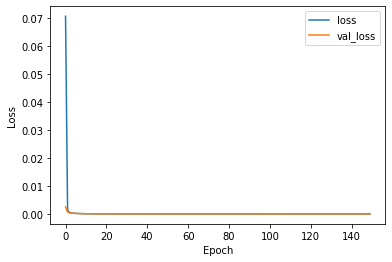

In [29]:
loss.plot()          
plt.xlabel('Epoch')
plt.ylabel('Loss')

In [30]:
predictions = model.predict(pred_in) 

2527/2527 [==============================] - 7s 3ms/step


In [31]:
#creating a table to easily compare true,predicted and error values

True_value = pd.DataFrame(pred_out)
predected_value = pd.DataFrame(predictions)
Error = predected_value - True_value
Error = Error.abs() 

compare = pd.concat([True_value,predected_value,Error],axis=1)
compare.columns = ['True_value','predected_value','Error']
Error.columns=['Error']


compare     

,True_value,predected_value,Error
0,1.000000,0.778664,0.221336
1,1.000000,0.778770,0.221230
2,0.999996,0.778800,0.221196
3,0.999996,0.778807,0.221189
4,0.999996,0.778820,0.221176
...,...,...,...
80844,0.133547,-0.002011,0.135558
80845,0.133528,-0.002011,0.135539
80846,0.133508,-0.002011,0.135519
80847,0.133489,-0.002011,0.135500


In [32]:
Error.max()

Error    0.256009
dtype: float64

In [33]:
np.sqrt(mean_squared_error(pred_out,predictions)) 

0.18334121997869762

In [34]:
mean_absolute_error(pred_out,predictions)

0.18026729226307758